In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import glob
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import applications
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras import backend as K
import gc
from tensorflow.keras.models import Model
import pickle
import numpy as np
import os
import glob
import cv2
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


In [17]:
train_dir = "/Users/ssathvikkrishna/archivefinal/sign_data/Dataset/train"
test_dir = "/Users/ssathvikkrishna/archivefinal/sign_data/Dataset/test"
SIZE = 224

def load_data(directory):
    data = []
    labels = []
    for label in os.listdir(directory):
        for file in glob.glob(os.path.join(directory, label, '*.*')):
            img = cv2.imread(file)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (SIZE, SIZE))
            data.append(img)
            labels.append(1 if label.endswith('g') else 0)
    return np.array(data), np.array(labels)

train_data, train_labels = load_data(train_dir)
test_data, test_labels = load_data(test_dir)

train_data = train_data / 255.0
test_data = test_data / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_data = train_data.reshape(-1, SIZE, SIZE, 3)
test_data = test_data.reshape(-1, SIZE, SIZE, 3)


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

In [19]:
import os

def count_image_files(directory):
    if not os.path.exists(directory):
        print(f"Directory {directory} does not exist.")
        return 0

    image_count = 0
    for root, _, files in os.walk(directory):
        for file in files:
            if os.path.splitext(file)[1].lower() in {'.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff'}:
                image_count += 1

    return image_count

train_directory = '/Users/ssathvikkrishna/archivefinal/sign_data/Dataset/train'
test_directory = '/Users/ssathvikkrishna/archivefinal/sign_data/Dataset/test'

total_train_images = count_image_files(train_directory)
total_test_images = count_image_files(test_directory)

print(f"Total number of image files in training directory: {total_train_images}")
print(f"Total number of image files in testing directory: {total_test_images}")
print(f"Total number of image files in both directories: {total_train_images + total_test_images}")


Total number of image files in training directory: 1149
Total number of image files in testing directory: 452
Total number of image files in both directories: 1601


In [21]:
import os

def list_image_files(directory):
    if not os.path.exists(directory):
        print(f"Directory {directory} does not exist.")
        return []

    all_files = os.listdir(directory)
    print("All files in directory:")
    print(all_files)  # Print all files to check contents
    
    image_extensions = {'.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff'}
    image_files = [file for file in all_files if os.path.splitext(file)[1].lower() in image_extensions]
    
    return image_files

image_directory = '/Users/ssathvikkrishna/archivefinal/sign_data/Dataset/train'

image_files = list_image_files(image_directory)

if image_files:
    print("Image files found:")
    for image_file in image_files:
        print(image_file)
else:
    print("No image files found.")


All files in directory:
['020_forg', '036_forg', '016_forg', '041_forg', '024', '001_forg', '023', '015', '040_forg', '017_forg', '012', '046', '041', '048', '013', '014', '022', '025', '037_forg', '021_forg', '040', '047', '038', '047_forg', '009', '036', '031', '006_forg', '026_forg', '030_forg', '030', '037', '001', '039', '006', '031_forg', '027_forg', '046_forg', '004_forg', '045_forg', '012_forg', '028_forg', '032_forg', '024_forg', '042', '025_forg', '045', '033_forg', '020', '048_forg', '027', '018', '016', '009_forg', '029', '029_forg', '044', '043', '017', '013_forg', '028', '044_forg', '026', '019', '021', '003', '004', '032', '018_forg', '035', '034_forg', '022_forg', '002_forg', '034', '033', '043_forg', '014_forg', '002', '038_forg', '039_forg', '015_forg', '042_forg', '003_forg', '023_forg', '035_forg', '019_forg']
No image files found.


In [31]:
def build_model(input_shape):
    model1 = models.Sequential()
    model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model1.add(layers.MaxPooling2D((2, 2)))
    
    model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model1.add(layers.MaxPooling2D((2, 2)))
    
    model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model1.add(layers.MaxPooling2D((2, 2)))
    
    model1.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model1.add(layers.MaxPooling2D((2, 2)))
    
    model1.add(layers.Conv2D(512, (3, 3), activation='relu'))  
    model1.add(layers.MaxPooling2D((2, 2)))
    
    model1.add(layers.Flatten())
    
    model1.add(layers.Dense(512, activation='relu'))
    model1.add(layers.Dropout(0.40))  
    model1.add(layers.Dense(2, activation='softmax'))  # Single output for binary classification
    
    return model1

input_shape = (SIZE, SIZE, 3)
model1 = build_model(input_shape)
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Use binary_crossentropy
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 10, 10, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,123,714 (30.99 MB)

 Trainable params: 8,123,714 (30.99 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [35]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

history = model1.fit(
    train_data, train_labels,
    validation_split=0.3,
    epochs=20,
    batch_size=64,
    callbacks=[early_stopping]
)


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 925ms/step - accuracy: 0.5150 - loss: 0.9459 - val_accuracy: 0.4667 - val_loss: 0.7020
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 901ms/step - accuracy: 0.5720 - loss: 0.6890 - val_accuracy: 0.4667 - val_loss: 0.6941
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 884ms/step - accuracy: 0.5985 - loss: 0.6815 - val_accuracy: 0.5333 - val_loss: 0.6840
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 879ms/step - accuracy: 0.5107 - loss: 0.6954 - val_accuracy: 0.4667 - val_loss: 0.7043
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 892ms/step - accuracy: 0.6004 - loss: 0.6720 - val_accuracy: 0.5884 - val_loss: 0.6593
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 899ms/step - accuracy: 0.7259 - loss: 0.5828 - val_accuracy: 0.7826 - val_loss: 0.5000
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 888ms/step - accuracy: 0.8918 - loss: 0.4682 - val_accuracy: 0.8696 - val_loss: 0.4186
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 873ms/step - accuracy: 0.8704 - loss: 0.3097 - val_accu

In [37]:

test_loss, test_acc = model1.evaluate(test_data, test_labels)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.9783 - loss: 0.0901
Test Loss: 0.05816161632537842, Test Accuracy: 0.9845132827758789


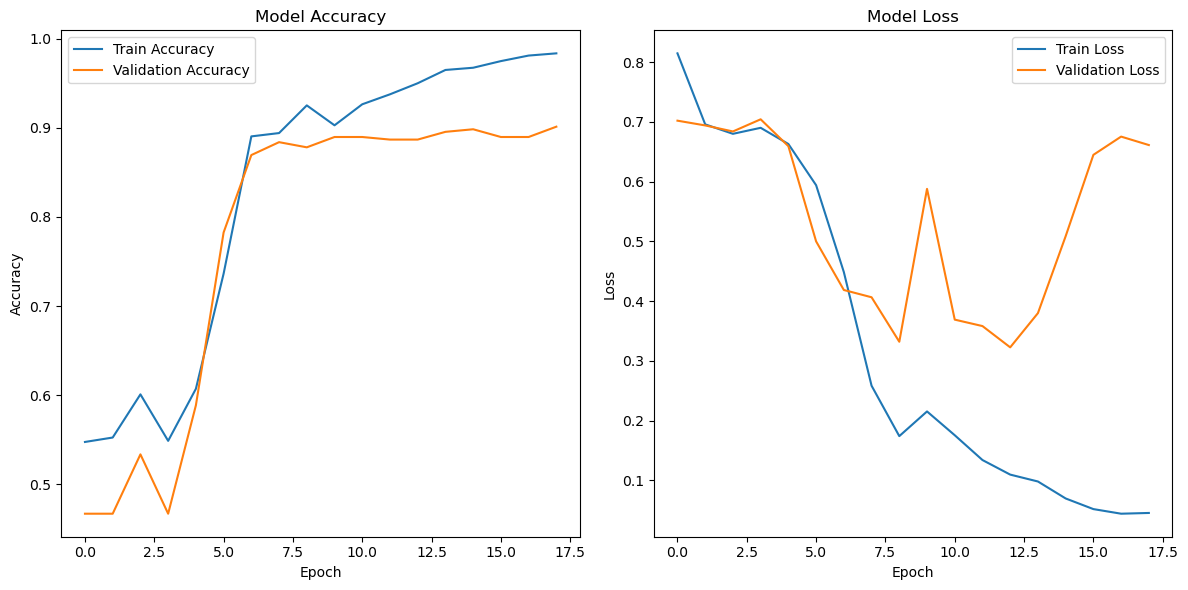

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.tight_layout()
plt.show()


In [43]:
model1.save("signatureforgery6layer.keras")